# 第1章 统计学习方法概论

高斯于1823年在误差e1 ,… , en独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！

使用最小二乘法拟和曲线
对于数据$(x_i, y_i)(i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时L2范数(残差平方和)最小时，h(x) 和 y 相似度最高，更拟合

一般的H(x)为n次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ 使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# 目标函数
def real_func(x):
    return np.sin(3*np.pi*x)/2

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [13]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1)+y1 for y1 in y_]

def fitting(M=0):
    """
    M    为 多项式的次数
    """    
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
      
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

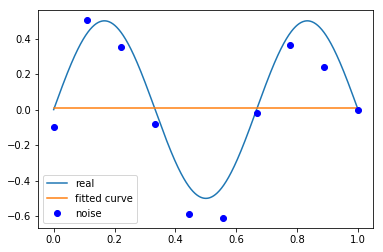

In [14]:
p_lsq_0 = fitting(M=0)

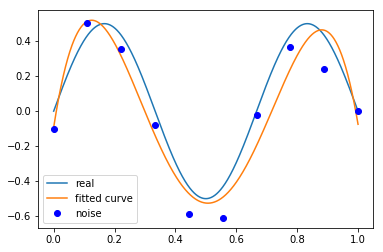

In [15]:
p_lsq_1 = fitting(M=4)

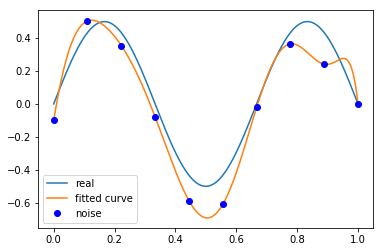

In [16]:
p_lsq_9 = fitting(M=9)